In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import STL
import seaborn as sns
from scipy import stats
import itertools
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller

In [2]:
df1= pd.read_csv("C:/Users/User/Desktop/hackathon/data1.csv")

1) EDA АНАЛИЗ

In [3]:
# Проверка на пропуски
print(df1.isna().sum())

# Проверка на дубликаты
print(df1.duplicated().sum())


value    0
date     0
dtype: int64
0


             value
count   974.000000
mean   2782.103696
std     874.436139
min       0.000000
25%    2124.000000
50%    2530.500000
75%    3316.500000
max    7713.000000


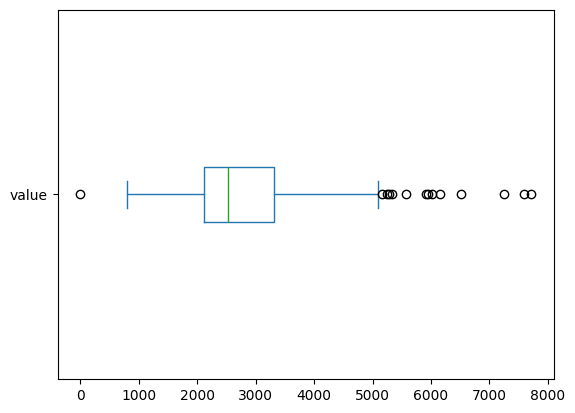

In [4]:
# Использование описательных статистик для выявления выбросов
print(df1.describe())

# Визуализация распределения значений
import matplotlib.pyplot as plt
df1['value'].plot(kind='box', vert=False)
plt.show()

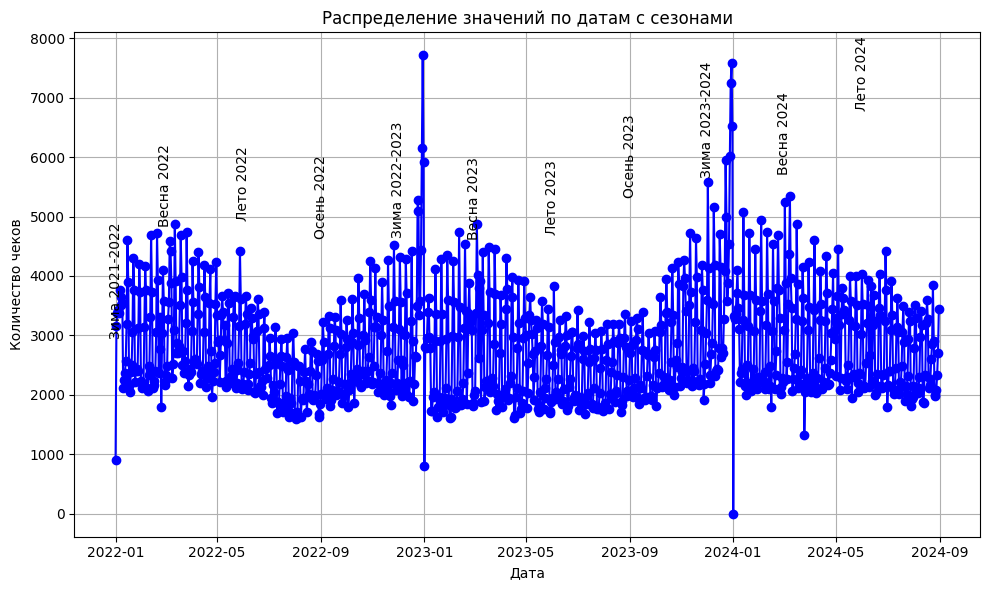

In [5]:
df1['date'] = pd.to_datetime(df1['date'])

# Ключевые даты и сезоны
season_dates = [
    ('2022-01-01', 'Зима 2021-2022'),
    ('2022-03-01', 'Весна 2022'),
    ('2022-06-01', 'Лето 2022'),
    ('2022-09-01', 'Осень 2022'),
    ('2022-12-01', 'Зима 2022-2023'),
    ('2023-03-01', 'Весна 2023'),
    ('2023-06-01', 'Лето 2023'),
    ('2023-09-01', 'Осень 2023'),
    ('2023-12-01', 'Зима 2023-2024'),
    ('2024-03-01', 'Весна 2024'),
    ('2024-06-01', 'Лето 2024')
]

# Преобразуем ключевые даты в формат datetime
season_dates = [(pd.to_datetime(date), season) for date, season in season_dates]

# Построение графика
plt.figure(figsize=(10, 6))  # Размер графика
plt.plot(df1['date'], df1['value'], marker='o', linestyle='-', color='b')  # Линия с маркерами
plt.title('Распределение значений по датам с сезонами')
plt.xlabel('Дата')
plt.ylabel('Количество чеков')

# Настройка подписей на оси X с сезонами
for date, season in season_dates:
    if date in df1['date'].values:
        # Смещение текста вниз
        plt.text(date, df1[df1['date'] == date]['value'].values[0] +4000, 
                 season, rotation=90, ha='center', va='top', fontsize=10)

# Добавление сетки и улучшение вида графика
plt.grid(True)

# Автоматическое расположение элементов, чтобы избежать перекрытия
plt.tight_layout()

# Показать график
plt.show()

2) ОБЩИЙ ТРЕНД

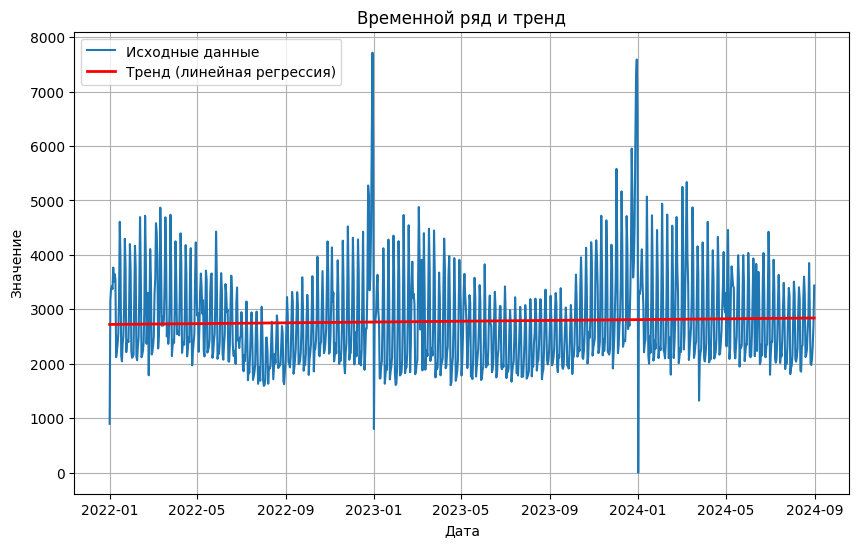

Наклон: 0.12, Перехват: 2723.21


In [6]:


# Пример данных
# Предположим, что у вас есть DataFrame df1 с колонками 'date' и 'value'
# df1['date'] - это дата, df1['value'] - это значение

# Преобразуем дату в числовое значение для модели линейной регрессии
df1['date_numeric'] = (df1['date'] - df1['date'].min()).dt.days  # Количество дней с начала периода

# Создадим модель линейной регрессии
model = LinearRegression()

# Обучаем модель на данных
X = df1['date_numeric'].values.reshape(-1, 1)  # Даты как независимая переменная
y = df1['value'].values  # Значения как зависимая переменная
model.fit(X, y)

# Получаем параметры тренда
slope = model.coef_[0]  # Наклон (slope) прямой
intercept = model.intercept_  # Перехват (intercept)

# Рассчитаем значения тренда
df1['trend'] = model.predict(X)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(df1['date'], df1['value'], label='Исходные данные')
plt.plot(df1['date'], df1['trend'], label='Тренд (линейная регрессия)', color='red', linewidth=2)
plt.title('Временной ряд и тренд')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Вывод параметров тренда
print(f"Наклон: {slope:.2f}, Перехват: {intercept:.2f}")


3) ДЕКОМПОЗИЦИЯ РЯДА

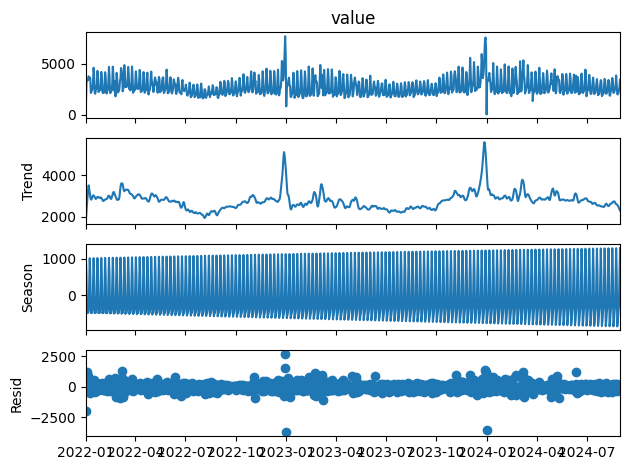

Тренд:
 date
2022-01-01    1830.033608
2022-01-02    2258.442208
2022-01-03    2639.085928
2022-01-04    2990.603480
2022-01-05    3321.726430
                 ...     
2024-08-27    2544.376944
2024-08-28    2492.606553
2024-08-29    2438.324497
2024-08-30    2378.629171
2024-08-31    2311.050921
Name: trend, Length: 974, dtype: float64
Сезонность:
 date
2022-01-01    1009.162777
2022-01-02     558.645832
2022-01-03    -483.151882
2022-01-04    -444.975375
2022-01-05    -485.792853
                 ...     
2024-08-27    -714.837473
2024-08-28    -472.312078
2024-08-29    -310.209585
2024-08-30     452.505056
2024-08-31    1288.032923
Name: season, Length: 974, dtype: float64
Остатки (Шум):
 date
2022-01-01   -1941.196385
2022-01-02     349.911960
2022-01-03    1224.065954
2022-01-04     877.371894
2022-01-05     537.066424
                 ...     
2024-08-27     149.460530
2024-08-28      68.705524
2024-08-29     199.885087
2024-08-30    -119.134227
2024-08-31    -161.083844
Name: r

In [7]:
df1['date'] = pd.to_datetime(df1['date'])
df1.set_index('date', inplace=True)

# Применение декомпозиции STL
stl = STL(df1['value'], seasonal=365)  # Период сезонности равен 365 дней (год)
result = stl.fit()

# Рисование графика с декомпозицией
result.plot()
plt.show()

# Вывод компонентов
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Вывод первых строк для анализа
print("Тренд:\n", trend)
print("Сезонность:\n", seasonal)
print("Остатки (Шум):\n", residual)

In [8]:
trend_mean = trend.mean()
trend_max = trend.max()
trend_min = trend.min()

print(f"Среднее значение тренда: {trend_mean}")
print(f"Максимальное значение тренда: {trend_max}")
print(f"Минимальное значение тренда: {trend_min}")
print (' ')
seasonal_mean = seasonal.mean()
seasonal_max = seasonal.max()
seasonal_min = seasonal.min()

print(f"Среднее значение сезонности: {seasonal_mean}")
print(f"Максимальное значение сезонности: {seasonal_max}")
print(f"Минимальное значение сезонности: {seasonal_min}")


print (' ')
residual_mean = residual.mean()
residual_std = residual.std()
residual_max = residual.max()
residual_min = residual.min()

print(f"Среднее значение остатков (шума): {residual_mean}")
print(f"Стандартное отклонение остатков: {residual_std}")
print(f"Максимальное значение остатков: {residual_max}")
print(f"Минимальное значение остатков: {residual_min}")


Среднее значение тренда: 2779.6721557658
Максимальное значение тренда: 5596.014199833452
Минимальное значение тренда: 1830.0336078538019
 
Среднее значение сезонности: 1.357055335485523
Максимальное значение сезонности: 1288.0329226547424
Минимальное значение сезонности: -854.9822177691602
 
Среднее значение остатков (шума): 1.0744849972765407
Стандартное отклонение остатков: 358.85992589459494
Максимальное значение остатков: 2690.507910924416
Минимальное значение остатков: -3717.563214943444


Тренд: Данные имеют явные колебания, но в целом тренд остаётся положительным. Это может указывать на рост активности, спроса или других факторов в долгосрочной перспективе. Вам стоит обратить внимание на пики и спады тренда, чтобы понимать, как изменяется поведение во времени.

Сезонность: Данные показывают сильные сезонные колебания, что означает наличие предсказуемых изменений в зависимости от времени года или других внешних факторов. Понимание этих циклов может помочь в будущем прогнозировать пики и спады.

Остатки (Шум): Остатки имеют большое стандартное отклонение, что говорит о значительных аномалиях или выбросах, которые не объясняются трендом или сезонностью. Это может быть связано с непредсказуемыми событиями, такими как праздники, изменения в законодательстве или другие экстраординарные обстоятельства.

Выбросы и большие колебания в остатках требуют дополнительного анализа, чтобы понять их причины и, возможно, улучшить модель для более точных прогнозов.

4. ДОБАВЛЕНИЕ ПРИЗНАКА ВЫХОДНОГО

In [9]:
df1.reset_index(inplace = True)

In [10]:
df1['is_weekend'] = (df1['date'].dt.weekday >= 5).astype(int)

In [11]:
df1

,date,value,date_numeric,trend,is_weekend
0,2022-01-01,898.0,0,2723.208909,1
1,2022-01-02,3167.0,1,2723.329967,1
2,2022-01-03,3380.0,2,2723.451025,0
3,2022-01-04,3423.0,3,2723.572083,0
4,2022-01-05,3373.0,4,2723.693141,0
...,...,...,...,...,...
969,2024-08-27,1979.0,969,2840.514251,0
970,2024-08-28,2089.0,970,2840.635309,0
971,2024-08-29,2328.0,971,2840.756367,0
972,2024-08-30,2712.0,972,2840.877426,0


5. АНАЛИЗ ПО ДНЯМ НЕДЕЛИ

In [12]:
# Преобразуем строку даты в тип данных datetime
df1['date'] = pd.to_datetime(df1['date'])

# Добавим новый столбец, который будет содержать день недели (0 - понедельник, 6 - воскресенье)
df1['day_of_week'] = df1['date'].dt.dayofweek

# Группируем по дням недели и вычисляем среднее значение
average_per_weekday = df1.groupby('day_of_week')['value'].mean()

# Выводим результат
print(average_per_weekday)


day_of_week
0    2105.812950
1    2195.920863
2    2300.417266
3    2429.381295
4    3143.338129
5    3933.200000
6    3358.374101
Name: value, dtype: float64


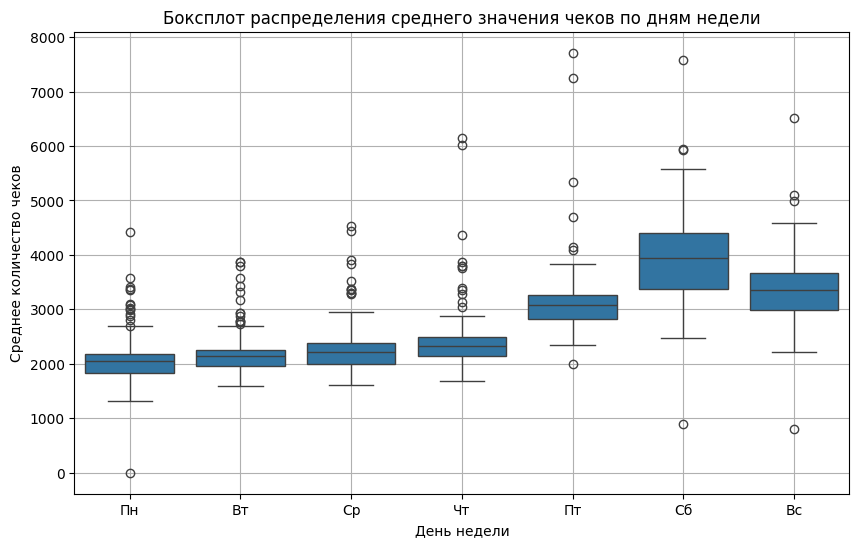

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='value', data=df1)

# Настроим отображение
plt.title('Боксплот распределения среднего значения чеков по дням недели')
plt.xlabel('День недели')
plt.ylabel('Среднее количество чеков')
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.grid(True)

# Показать график
plt.show()

In [14]:
print("\nРезультаты теста Шапиро-Уилка на нормальность для каждого дня недели:")

for day in range(7):
    day_data = df1[df1['day_of_week'] == day]['value']
    
    # Проверка на нормальность с помощью теста Шапиро-Уилка
    stat, p_value = stats.shapiro(day_data)
    
    # Выводим результаты
    print(f"День недели: {['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'][day]}")
    print(f"P-value: {p_value:}")


Результаты теста Шапиро-Уилка на нормальность для каждого дня недели:
День недели: Пн
P-value: 6.662224880564597e-12
День недели: Вт
P-value: 2.3690474026434568e-12
День недели: Ср
P-value: 2.9780952733767683e-13
День недели: Чт
P-value: 3.305747057665606e-17
День недели: Пт
P-value: 6.116708612456744e-17
День недели: Сб
P-value: 2.0211202246030304e-05
День недели: Вс
P-value: 2.4403558858394226e-08


Значения для КАЖДОГО дня недели имеют ненормальное распределение

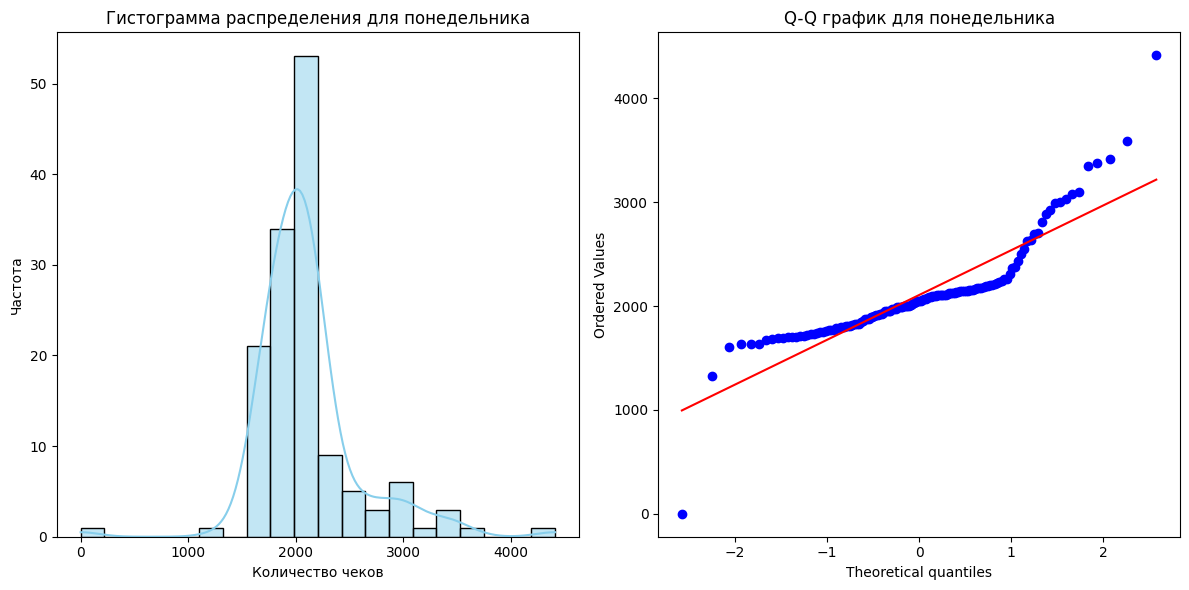

In [15]:
# Извлекаем данные для понедельника (day_of_week == 0)
monday_data = df1[df1['day_of_week'] == 0]['value']

# Настроим размер графика
plt.figure(figsize=(12, 6))

# 1. Гистограмма распределения
plt.subplot(1, 2, 1)
sns.histplot(monday_data, kde=True, color='skyblue', bins=20)
plt.title('Гистограмма распределения для понедельника')
plt.xlabel('Количество чеков')
plt.ylabel('Частота')

# 2. Q-Q график
plt.subplot(1, 2, 2)
stats.probplot(monday_data, dist="norm", plot=plt)
plt.title('Q-Q график для понедельника')

# Показать оба графика
plt.tight_layout()
plt.show()

Пример визуализации распределения для понедельника

По визуализации боксплотов видно, что наиболее похожие дни находятся рядом друг с другом, поэтому можно сравнить их попарно  

In [16]:
for day in range(6):  # 0..5 (сравниваем дни 0 с 1, 1 с 2 и т.д.)
    day_data_1 = df1[df1['day_of_week'] == day]['value']   # Данные для дня 'day'
    day_data_2 = df1[df1['day_of_week'] == day + 1]['value']  # Данные для следующего дня 'day + 1'
    
    # Проводим t-тест
    t_stat, p_value = stats.ttest_ind(day_data_1, day_data_2)
    
    # Выводим результат
    print(f"Сравнение дней {day} и {day+1}:")
    print(f"P-значение: {p_value:.4f}")
    print (' ')
    

Сравнение дней 0 и 1:
P-значение: 0.0946
 
Сравнение дней 1 и 2:
P-значение: 0.0539
 
Сравнение дней 2 и 3:
P-значение: 0.0502
 
Сравнение дней 3 и 4:
P-значение: 0.0000
 
Сравнение дней 4 и 5:
P-значение: 0.0000
 
Сравнение дней 5 и 6:
P-значение: 0.0000
 


исходя из этих тестов и визуализации, можно разделить дни недели на следующие кластеры:

1) пн и вт
2) ср и чт
3) пт
4) сб
5) вс

Последние три дня наиболее значимо отличаются от всех других и друг от друга

6. АНАЛИЗ ПО СЕЗОНАМ

По первым визуализациям явно видно, что количество чеков сильно зависит от сезона. Посмотрим внимательнее на эту разницу 

In [17]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'

# Создаем новую колонку 'season', применяя функцию по месяцу
df1['season'] = df1['date'].dt.month.apply(get_season)

Для того чтобы полноценно сравнить сезоны, предлагаю не брать обрубки (в нашем случае первую зиму, так как она без данных за декабрь)

In [18]:
df_seasons = df1[df1['date'] >= '2022-03-01']


In [19]:
# Группируем данные по сезону и считаем среднее значение для 'value'
average_by_season = df_seasons.groupby('season')['value'].mean()

# Выводим результат
print(average_by_season)

season
Весна    2895.246377
Зима     3112.154696
Лето     2476.463768
Осень    2688.324176
Name: value, dtype: float64


In [20]:


# Для каждого сезона проверяем нормальность распределения
for season in df_seasons['season'].unique():
    season_data = df_seasons[df_seasons['season'] == season]['value']
    
    # Применяем тест Шапиро-Уилка
    stat, p_value = stats.shapiro(season_data)
    
    print(f"Сезон: {season}")
    print(f"Тест Шапиро-Уилка: статистика = {stat:}, p-значение = {p_value:}")

Сезон: Весна
Тест Шапиро-Уилка: статистика = 0.9482071440250008, p-значение = 2.651876403265678e-08
Сезон: Лето
Тест Шапиро-Уилка: статистика = 0.935324267867546, p-значение = 1.260107011405623e-09
Сезон: Осень
Тест Шапиро-Уилка: статистика = 0.9014672924683347, p-значение = 1.2071883432609688e-09
Сезон: Зима
Тест Шапиро-Уилка: статистика = 0.918956095373727, p-значение = 1.8225501446754072e-08


Данные по каждому сезону распределены ненормально

C:\Users\User\AppData\Local\Temp\ipykernel_8648\2830608779.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_seasons, x='season', y='value', palette='Set2')


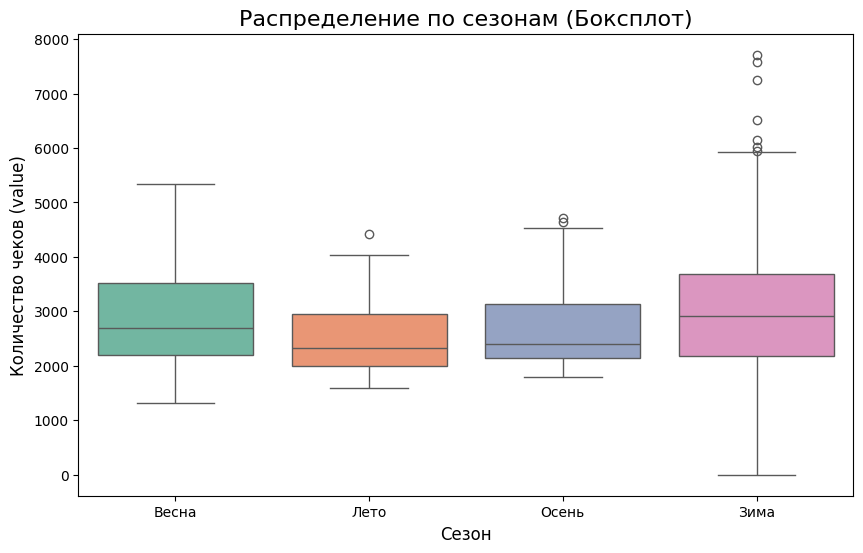

In [21]:
# Настроим размер графика
plt.figure(figsize=(10, 6))

# Строим боксплот распределения по сезонам
sns.boxplot(data=df_seasons, x='season', y='value', palette='Set2')

# Добавляем заголовок и подписи
plt.title('Распределение по сезонам (Боксплот)', fontsize=16)
plt.xlabel('Сезон', fontsize=12)
plt.ylabel('Количество чеков (value)', fontsize=12)

# Показываем график
plt.show()

In [22]:

# Получаем уникальные сезоны из df_seasons
seasons = df_seasons['season'].unique()

# Генерируем все возможные пары сезонов
season_combinations = list(itertools.combinations(seasons, 2))

# Проведение t-теста для каждой пары сезонов
for season1, season2 in season_combinations:
    # Извлекаем данные для двух сезонов
    data_season1 = df_seasons[df_seasons['season'] == season1]['value']
    data_season2 = df_seasons[df_seasons['season'] == season2]['value']
    
    # Проведение t-теста
    t_stat, p_value = stats.ttest_ind(data_season1, data_season2)
    
    # Выводим результаты
    print(f"Сравнение: {season1} vs {season2}")
    print(f"t-статистика: {t_stat:.4f}, p-значение: {p_value:.4f}")
    
    # Интерпретация p-значения
    if p_value < 0.05:
        print("Распределения статистически различаются (отклоняем нулевую гипотезу)\n")
    else:
        print("Распределения не различаются (не отклоняем нулевую гипотезу)\n")


Сравнение: Весна vs Лето
t-статистика: 6.8135, p-значение: 0.0000
Распределения статистически различаются (отклоняем нулевую гипотезу)

Сравнение: Весна vs Осень
t-статистика: 2.7897, p-значение: 0.0055
Распределения статистически различаются (отклоняем нулевую гипотезу)

Сравнение: Весна vs Зима
t-статистика: -2.2491, p-значение: 0.0250
Распределения статистически различаются (отклоняем нулевую гипотезу)

Сравнение: Лето vs Осень
t-статистика: -3.4573, p-значение: 0.0006
Распределения статистически различаются (отклоняем нулевую гипотезу)

Сравнение: Лето vs Зима
t-статистика: -7.3186, p-значение: 0.0000
Распределения статистически различаются (отклоняем нулевую гипотезу)

Сравнение: Осень vs Зима
t-статистика: -4.0227, p-значение: 0.0001
Распределения статистически различаются (отклоняем нулевую гипотезу)



Статистически все сезоны значимо отличаются между собой

7. АНАЛИЗ АВТОКОРРЕЛЯЦИИ 

Автокорреляция — это показатель, который измеряет зависимость текущего значения временного ряда от его предыдущих значений. При расчете автокорреляции для разных лагов вычисляются связи между данными на разных временных интервалах. Это помогает понять, как значения в один момент времени (например, в определённый день) зависят от значений в предыдущие дни. Результаты показывают, что существует как краткосрочная зависимость (например, зависимость между значением и значением на предыдущий день), так и долгосрочные циклы, указывающие на сезонные или колебательные паттерны.

Лаг 0: 1.0000
Лаг 1: 0.5476
Лаг 2: -0.0067
Лаг 3: -0.2108
Лаг 4: -0.2125
Лаг 5: -0.0249
Лаг 6: 0.4427
Лаг 7: 0.7249
Лаг 8: 0.4051
Лаг 9: -0.0663
Лаг 10: -0.2569
Лаг 11: -0.2696
Лаг 12: -0.0863
Лаг 13: 0.3885
Лаг 14: 0.6842
Лаг 15: 0.3685
Лаг 16: -0.0939
Лаг 17: -0.2673
Лаг 18: -0.2709
Лаг 19: -0.0949
Лаг 20: 0.3688
Лаг 21: 0.6585
Лаг 22: 0.3621
Лаг 23: -0.0852
Лаг 24: -0.2624
Лаг 25: -0.2741
Лаг 26: -0.0994
Лаг 27: 0.3575
Лаг 28: 0.6503
Лаг 29: 0.3524
Лаг 30: -0.1008


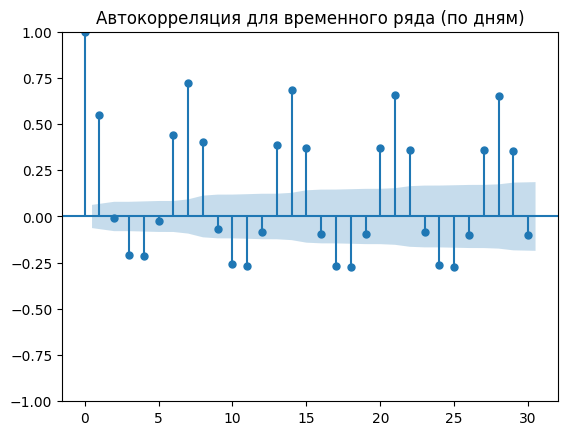

In [23]:
acf_values, confint = acf(df1['value'], nlags=30, alpha=0.05)

# Выводим значения автокорреляции для каждого лага
for lag, value in enumerate(acf_values):
    print(f'Лаг {lag}: {value:.4f}')

# Строим график автокорреляции для всех лагов
plot_acf(df1['value'], lags=30)  # lags=30 для отображения первых 30 лагов
plt.title('Автокорреляция для временного ряда (по дням)')
plt.show()

8. АНАЛИЗ СТАЦИОНАРНОСТИ



Стационарность временного ряда — это свойство ряда, при котором его статистические характеристики (такие как среднее, дисперсия и ковариация) не изменяются со временем. Это значит, что поведение ряда остаётся постоянным, и его тенденции или колебания не зависят от того, на каком этапе временного ряда вы находитесь.

Есть несколько ключевых признаков стационарности:

Среднее: среднее значение ряда остается постоянным, не растет и не падает с течением времени.
Дисперсия: разброс значений вокруг среднего остается одинаковым.
Автокорреляция: зависимость между значениями ряда на разных временных интервалах не меняется с течением времени.
Если эти характеристики стабильны, ряд называется стационарным. Если же, например, среднее значение со временем изменяется (например, ряд растет или уменьшается), то ряд считается нестационарным.

Для работы с нестационарными рядами часто применяют преобразования (например, дифференцирование), чтобы привести их к стационарному виду, так как многие методы анализа и прогнозирования временных рядов, такие как модели ARIMA, требуют, чтобы ряд был стационарным.

In [24]:
# Предполагаем, что ваш временной ряд — это столбец 'value'
series = df1['value']

# Выполняем тест Дики-Фуллера (ADF)
adf_result = adfuller(series)

# Выводим результаты
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"\t{key}: {value}")

# Интерпретация
if adf_result[1] < 0.05:
    print("Ряд стационарен (отклоняем нулевую гипотезу).")
else:
    print("Ряд нестационарен (не отклоняем нулевую гипотезу).")

ADF Statistic: -3.3317553865542506
p-value: 0.01351732185983943
Critical Values:
	1%: -3.4372303791313144
	5%: -2.864577551835195
	10%: -2.568387363624452
Ряд стационарен (отклоняем нулевую гипотезу).


Ряд стационарен, так как p-value < 0.05 и значение статистики теста меньше критического значения для уровня значимости 5%. Таким образом, вы можете уверенно утверждать, что временной ряд не содержит единичного корня и его характеристики (например, среднее, дисперсия) стабильны во времени.

9. ДОБАВЛЕНИЕ ПРИЗНАКА ПРАЗДНИК ИЛИ НЕТ

In [25]:
df1.reset_index(drop=True, inplace=True)


holidays = [
    '2022-01-01', '2022-01-07', '2022-02-23', '2022-03-08', '2022-05-01', 
    '2022-05-09', '2022-06-12', '2022-11-04'
]

# Преобразуем строки в формат datetime для сравнения
holidays = pd.to_datetime(holidays)

# Добавляем новый столбец 'is_holiday' с 1 для праздников и 0 для обычных дней
df1['is_holiday'] = df1['date'].isin(holidays).astype(int)

10. ИТОГОВЫЙ ВИД ДАТАФРЕЙМА

In [26]:
df1

,date,value,date_numeric,trend,is_weekend,day_of_week,season,is_holiday
0,2022-01-01,898.0,0,2723.208909,1,5,Зима,1
1,2022-01-02,3167.0,1,2723.329967,1,6,Зима,0
2,2022-01-03,3380.0,2,2723.451025,0,0,Зима,0
3,2022-01-04,3423.0,3,2723.572083,0,1,Зима,0
4,2022-01-05,3373.0,4,2723.693141,0,2,Зима,0
...,...,...,...,...,...,...,...,...
969,2024-08-27,1979.0,969,2840.514251,0,1,Лето,0
970,2024-08-28,2089.0,970,2840.635309,0,2,Лето,0
971,2024-08-29,2328.0,971,2840.756367,0,3,Лето,0
972,2024-08-30,2712.0,972,2840.877426,0,4,Лето,0
